In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset from csv file
def read_data(file):
    data = pd.read_csv(file, header=None , index_col=None)
    return data
data = read_data('data.txt')
data.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
#shuffling and splitting of the dataset
def split_data(data):
    df = pd.DataFrame(data)
    #shuffle the dataset
    df = df.sample(frac=1)
    #split the dataset
    split = np.random.rand(len(df)) < 0.7
    train = np.asmatrix(df[split], dtype = 'float64')
    test = np.asmatrix(df[~split], dtype = 'float64')
    X_train = train[:, :-1]
    y_train = train[:, -1]
    X_test = test[:, :-1]
    y_test = test[:,-1]
    print(df)
    return X_train,y_train,X_test,y_test
X_train,y_train,X_test,y_test = split_data(data)

            0         1         2         3  4
894  -1.83910  -9.08830   9.24160 -0.104320  1
1249 -3.38000  -0.70770   2.53250  0.718080  1
588  -0.27802   8.18810  -3.13380 -2.527600  0
1353  0.11592   3.22190  -3.43020 -2.845700  1
223   4.64640  10.53260  -4.58520 -4.206000  0
939  -2.05290   3.83850  -0.79544 -1.213800  1
314   1.18110   8.38470  -2.05670 -0.903450  0
620   3.46260  -4.44900   3.54270  0.154290  0
338   0.96414   5.61600   2.21380 -0.125010  0
671   0.51947  -3.26330   3.08950 -0.984920  0
856   0.24261   0.57318  -1.94020  0.440070  1
1328 -1.39680  -9.66980   9.46520 -0.348720  1
390  -0.36279   8.28950  -1.92130 -3.333200  0
155   2.48600  -0.99533   5.34040 -0.154750  0
1363 -1.16670  -1.42370   2.92410  0.661190  1
249   1.01350   8.45510  -1.67200 -2.081500  0
373   1.91050   8.87100  -2.33860 -0.756040  0
315   0.32920  -4.45520   4.57180 -0.988800  0
881  -4.48610 -13.28890  17.30870 -3.219400  1
121   4.07130  10.40230  -4.17220 -4.758200  0
262   1.81140

In [4]:
#initializing params
alpha = 0.7
epoch = 100
W = np.zeros(X_train.shape[1]+1)

In [5]:
#activation function
def activation(z):
        if z>=0:
            return 1
        else:
            return 0   

In [6]:
 #prediction function
 def predict(x):
    z = np.dot(x, W[1:]) + W[0]
    g = activation(z)
    return g

epoch:0  weight:[ 11.9        -16.82540755 -16.82540755 -16.82540755 -16.82540755]  learning rate:0.7  Training Accuracy:94.64285714285714
epoch:1  weight:[ 18.2        -24.44324225 -24.44324225 -24.44324225 -24.44324225]  learning rate:0.7  Training Accuracy:95.48319327731093
epoch:2  weight:[ 25.2        -34.56333195 -34.56333195 -34.56333195 -34.56333195]  learning rate:0.7  Training Accuracy:95.58823529411765
epoch:3  weight:[ 32.9       -46.9986685 -46.9986685 -46.9986685 -46.9986685]  learning rate:0.7  Training Accuracy:95.69327731092437
epoch:4  weight:[ 41.3        -58.96945005 -58.96945005 -58.96945005 -58.96945005]  learning rate:0.7  Training Accuracy:95.58823529411765
epoch:5  weight:[ 49.        -71.4047866 -71.4047866 -71.4047866 -71.4047866]  learning rate:0.7  Training Accuracy:95.69327731092437
epoch:6  weight:[ 57.4        -83.37556815 -83.37556815 -83.37556815 -83.37556815]  learning rate:0.7  Training Accuracy:95.58823529411765
epoch:7  weight:[ 65.1       -95.8109

epoch:60  weight:[ 545.3        -821.47271185 -821.47271185 -821.47271185 -821.47271185]  learning rate:0.7  Training Accuracy:95.48319327731093
epoch:61  weight:[ 554.4       -835.2228234 -835.2228234 -835.2228234 -835.2228234]  learning rate:0.7  Training Accuracy:95.48319327731093
epoch:62  weight:[ 563.5        -848.97293495 -848.97293495 -848.97293495 -848.97293495]  learning rate:0.7  Training Accuracy:95.48319327731093
epoch:63  weight:[ 572.6       -862.7230465 -862.7230465 -862.7230465 -862.7230465]  learning rate:0.7  Training Accuracy:95.48319327731093
epoch:64  weight:[ 581.7        -876.47315805 -876.47315805 -876.47315805 -876.47315805]  learning rate:0.7  Training Accuracy:95.48319327731093
epoch:65  weight:[ 590.8       -890.2232696 -890.2232696 -890.2232696 -890.2232696]  learning rate:0.7  Training Accuracy:95.48319327731093
epoch:66  weight:[ 599.9        -903.97338115 -903.97338115 -903.97338115 -903.97338115]  learning rate:0.7  Training Accuracy:95.48319327731093


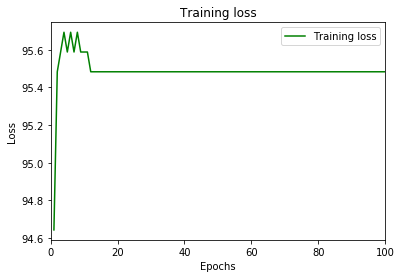

In [7]:
 #training to learn the weights
 def train(X_train, y_train):
        loss_train = []
        epochs = range(1,epoch+1)
        for i in range(epoch):
            correct = 0
            for x, y in zip(X_train, y_train):
                prediction = predict(x)
                y = np.array(y)[0][0]
                x = np.array(x)[0]
                error = y - prediction
                actual_value = int(y)
                if actual_value == prediction:
                  correct += 1
                W[1:] += alpha * error * x[0]
                W[0] += alpha * error
            training_accuracy =  correct/float(X_train.shape[0])*100.0      
            loss_train.append(training_accuracy)
            print("epoch:"+str(i)+"  weight:"+str(W)+"  learning rate:"+str(alpha)+"  Training Accuracy:"+str(training_accuracy))
        plt.plot(epochs, loss_train, 'g', label='Training loss')        
        plt.xlim(0,epoch)
        plt.title('Training loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

train(X_train, y_train)            

Predictions on test data:
X: [[-2.0529   3.8385  -0.79544 -1.2138 ]] prediction: 1 Actual value:1
X: [[ 1.1811   8.3847  -2.0567  -0.90345]] prediction: 0 Actual value:0
X: [[ 3.4626  -4.449    3.5427   0.15429]] prediction: 0 Actual value:0
X: [[ -4.6338 -12.7509  16.7166  -3.2168]] prediction: 1 Actual value:1
X: [[ 2.4196   6.4665  -0.75688  0.228  ]] prediction: 0 Actual value:0
X: [[-2.2261 12.5398  2.9438 -3.5258]] prediction: 0 Actual value:0
X: [[ 4.1736   3.3336  -1.4244   0.60429]] prediction: 0 Actual value:0
X: [[-1.2369  -1.6906   2.518    0.51636]] prediction: 1 Actual value:1
X: [[ 3.7935  7.9853 -2.5477 -1.872 ]] prediction: 0 Actual value:0
X: [[ 4.616  10.1788 -4.2185 -4.4245]] prediction: 0 Actual value:0
X: [[-2.5373 -6.959   8.8054  1.5289]] prediction: 0 Actual value:1
X: [[2.1948  1.3781  1.1582  0.85774]] prediction: 0 Actual value:0
X: [[ 0.49571 10.2243  -1.097   -4.0159 ]] prediction: 0 Actual value:0
X: [[ -3.73   -12.9723  12.9817  -2.684 ]] prediction: 1 A

X: [[-0.38214  8.3909   2.1624  -3.7405 ]] prediction: 0 Actual value:0
X: [[-0.62684 -6.301    4.7843   1.106  ]] prediction: 1 Actual value:1
X: [[ 4.6014   5.6264  -2.1235   0.19309]] prediction: 0 Actual value:0
X: [[-3.3884  -8.215   10.3315   0.98187]] prediction: 1 Actual value:1
X: [[-1.5252  -6.2534   5.3524   0.59912]] prediction: 1 Actual value:1
X: [[ 1.04   -6.9321  8.2888 -1.2991]] prediction: 0 Actual value:0
X: [[ 3.4566  9.5228 -4.0112 -3.5944]] prediction: 0 Actual value:0
X: [[-3.0193   1.7775   0.73745 -0.45346]] prediction: 1 Actual value:1
X: [[-1.6706  -2.09     1.584    0.71162]] prediction: 1 Actual value:1
X: [[-1.8187  -9.0366   9.0162  -0.12243]] prediction: 1 Actual value:1
X: [[ 0.53936  3.8944  -4.8166  -4.3418 ]] prediction: 1 Actual value:1
X: [[ 3.4647  -3.9172   3.9746   0.36119]] prediction: 0 Actual value:0
X: [[ 2.3925  9.798  -3.0361 -2.8224]] prediction: 0 Actual value:0
X: [[-1.8046 -6.8141  6.7019  1.1681]] prediction: 1 Actual value:1
X: [[ 1.

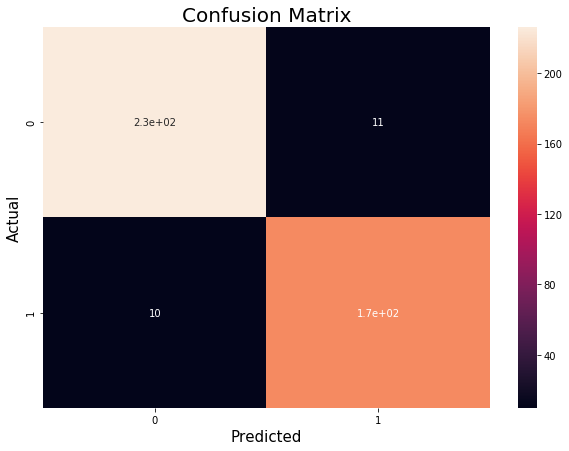

In [8]:
#Testset accuracy, Confusion Matrix and Accuracy metrics
def test(X_test, y_test):
    print("Predictions on test data:")
    correct = 0
    tp,fp,tn,fn = 0,0,0,0
    for x,y in zip(X_test,y_test):
        prediction = predict(x)
        actual_value = int(np.array(y)[0][0])
        print("X: "+str(x)+" prediction: "+str(prediction)+" Actual value:"+str(actual_value))
        if actual_value == prediction:
          correct += 1
        if actual_value == 0 and prediction == 0:
          tp += 1
        if actual_value == 1 and prediction ==1:
          tn += 1
        if actual_value == 0 and prediction ==1:
          fn += 1
        if actual_value == 1 and prediction == 0:
          fp += 1  
    test_accuracy =  correct/float(X_test.shape[0])*100.0
    print("Test Accuracy:"+str(test_accuracy))
    print()
    print("Accuracy metrics:")
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print("Accuracy: "+str(accuracy))
    print("Precision: "+str(precision))
    print("Recall: "+str(recall))
    print()    
    print("Confusion matrix:")
    cm = [[tp,fp],[fn,tn]]
    print(cm)
    print()
    df_cm = pd.DataFrame(cm, range(2), range(2))
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True)
    plt.title('Confusion Matrix', fontsize = 20) 
    plt.xlabel('Predicted', fontsize = 15) 
    plt.ylabel('Actual', fontsize = 15) 

plt.show()
test(X_test, y_test)
